In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Установим стиль графиков
sns.set(style="whitegrid")


In [2]:
df = pd.read_csv('berkeley.csv')

In [3]:
df.head()

,Year,Major,Gender,Admission
0,1973,C,F,Rejected
1,1973,B,M,Accepted
2,1973,Other,F,Accepted
3,1973,Other,M,Accepted
4,1973,Other,M,Rejected


In [8]:
df.Admission.unique()

array(['Rejected', 'Accepted'], dtype=object)

In [17]:
df.Major.unique()

array(['C', 'B', 'Other', 'F', 'A', 'D', 'E'], dtype=object)

In [19]:
df_students = df[df['Major'] != 'Other']

In [20]:
df_students.groupby(['Gender', 'Admission']).agg({'Admission':'count'})

Admission
Gender Admission           
F      Accepted         557
       Rejected        1278
M      Accepted        1511
       Rejected        1493

In [92]:
gender_admission_rate = df_students.groupby(['Gender', 'Admission']) \
                        .size().unstack().fillna(0)
gender_admission_rate['total'] = gender_admission_rate['Accepted'] \
                                + gender_admission_rate['Rejected']
gender_admission_rate['perc_accept'] = gender_admission_rate['Accepted'] / gender_admission_rate['total']

In [114]:
all_gender_admission = df_students.groupby(['Major', 'Gender', 'Admission']) \
                        .size().unstack().fillna(0)
all_gender_admission['total'] = all_gender_admission['Accepted'] \
                                + all_gender_admission['Rejected']
all_gender_admission['perc_accept'] = all_gender_admission['Accepted'] / all_gender_admission['total']
all_gender_admission = all_gender_admission.reset_index()

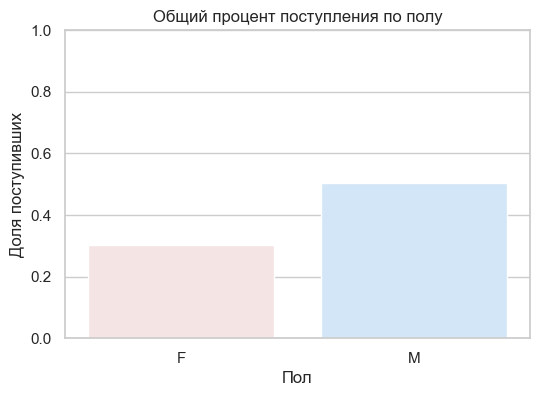

In [129]:
# Построим график общего процента поступления по полу
plt.figure(figsize=(6, 4))
sns.barplot(
    x=gender_admission_rate.index,
    y=gender_admission_rate['perc_accept'].values,
    palette=['#F8E1E1', '#CCE6FE']
)
plt.title('Общий процент поступления по полу')
plt.ylabel('Доля поступивших')
plt.xlabel('Пол')
plt.ylim(0, 1)
plt.show()

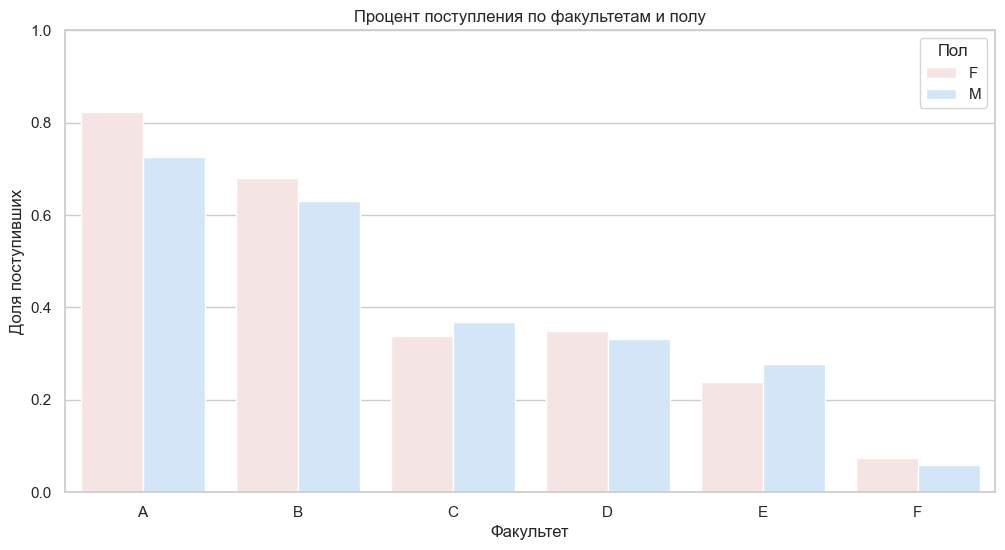

In [125]:
# Построим график поступления по факультетам и полу
plt.figure(figsize=(12, 6))
sns.barplot(
    data=all_gender_admission,
    x='Major',
    y='perc_accept',
    hue='Gender',
    palette=['#F8E1E1', '#CCE6FE']
)
plt.title('Процент поступления по факультетам и полу')
plt.ylabel('Доля поступивших')
plt.xlabel('Факультет')
plt.ylim(0, 1)
plt.legend(title='Пол')
plt.show()

На этом графике уже проявляется парадокс Симпсона:
во многих факультетах женщины поступают с большей вероятностью, чем мужчины,
но в целом по университету мужчины поступают чаще.

Это происходит потому, что женщины чаще подавали документы на факультеты с высокой конкуренцией и низким уровнем поступления,
в то время как мужчины чаще выбирали факультеты с более высокой вероятностью поступления.

То есть:
большинство мужчин (более 50%) подали заявление на факультеты A и B с высоким процентом поступивших, в то время как большинство женщин решили поступать на более "сложные" факультеты.

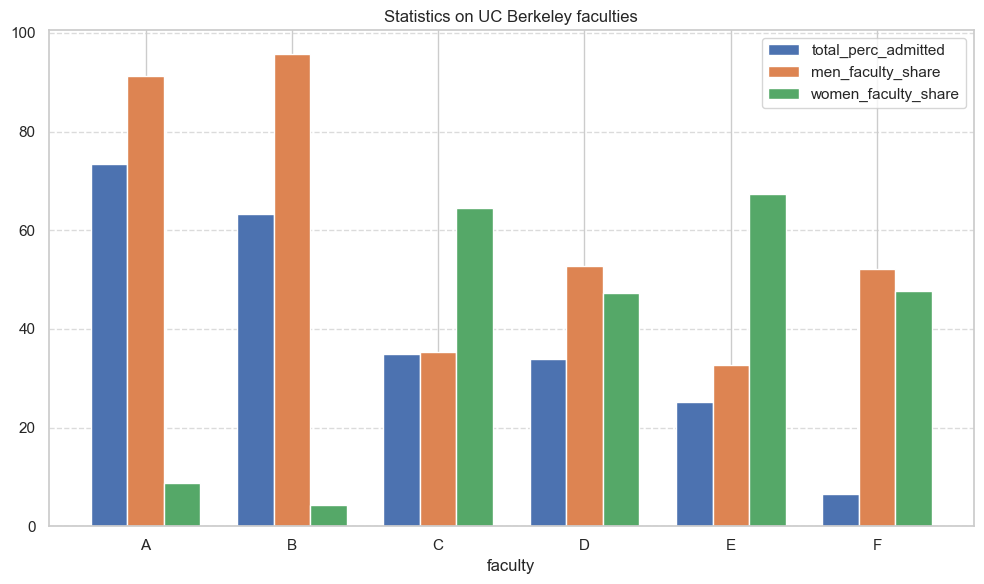

In [132]:
# Общий процент поступивших по факультету
total_admitted = (
    df_students.groupby("Major")["Admission"]
    .apply(lambda x: (x == "Accepted").mean() * 100)
    .rename("total_perc_admitted")
)

# Доля мужчин и женщин по факультетам
gender_counts = (
    df_students.groupby(["Major", "Gender"])
    .size()
    .unstack(fill_value=0)
)

gender_shares = gender_counts.div(gender_counts.sum(axis=1), axis=0) * 100
gender_shares = gender_shares.rename(columns={"M": "men_faculty_share", "F": "women_faculty_share"})

# Объединяем все в один DataFrame
result_df = pd.concat([total_admitted, gender_shares], axis=1).reset_index()

# Построим график
plt.figure(figsize=(10, 6))
bar_width = 0.25
x = range(len(result_df))

plt.bar([i - bar_width for i in x], result_df["total_perc_admitted"], width=bar_width, label="total_perc_admitted")
plt.bar(x, result_df["men_faculty_share"], width=bar_width, label="men_faculty_share")
plt.bar([i + bar_width for i in x], result_df["women_faculty_share"], width=bar_width, label="women_faculty_share")

plt.xticks(ticks=x, labels=result_df["Major"])
plt.xlabel("faculty")
plt.title("Statistics on UC Berkeley faculties")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()